In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# EDA

In [94]:
df = pd.read_excel('customer_retention_dataset (2).xlsx')
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [95]:
pd.set_option('display.max_columns',None) #  This will enable us to see truncated columns
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer 

In [96]:
df.shape

(269, 71)

In [97]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [100]:
df.duplicated().sum()

166

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [103]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [104]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,103.000000
mean,232449.844660
std,150755.596481
min,110008.000000
25%,132001.000000
50%,201305.000000
75%,202156.500000
max,560037.000000


# Visualisation

In [105]:
def count(x):
    plt.figure(figsize = (10,5))
    sns.countplot(x,data = df)
    plt.show()

In [106]:
def ycount(y):
    plt.figure(figsize = (10,10))
    sns.countplot(y = y ,data = df)
    plt.show()
def hist(x):
    plt.figure(figsize = (15,5))
    sns.histplot(x)
    plt.show()
def scatter(x,y,data):
    plt.figure(figsize = (10,5))
    plt.scatter(x,y,data=df)
    plt.xlabel(x)
    plt.ylabel(y)
    print('Scatterpot between',x,'and',y)
    plt.show()

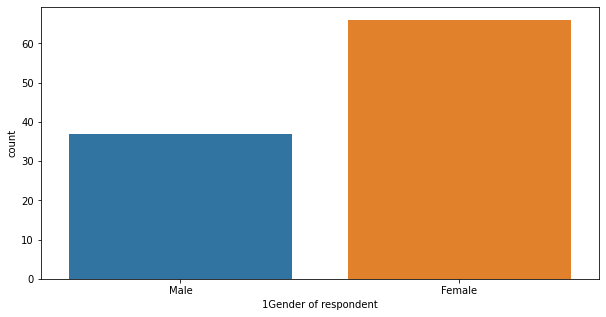

In [107]:
count(df['1Gender of respondent'])

Female customers are more than male customers

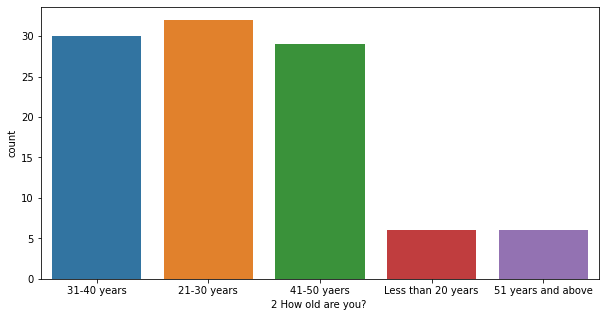

In [108]:
count(df['2 How old are you? '])

Age between 21-30 are the customers who placed highest no. of orders.

Age between 31-40 are the customers who placed 2nd highest no. of orders.

Age between 41-50 are the customers who placed 3nd highest no. of orders.

People of age group of <20 ans >51 have placed the lowest no. of orders.

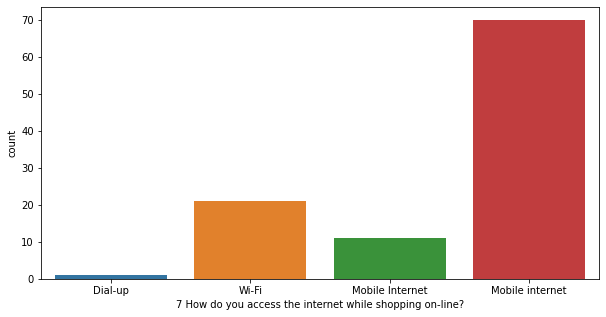

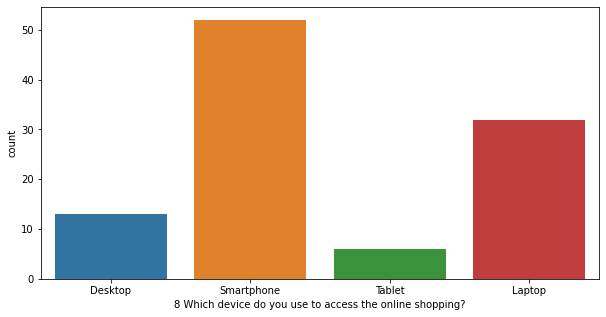

In [109]:
count(df['7 How do you access the internet while shopping on-line?'])
count(df['8 Which device do you use to access the online shopping?'])

How do you access the internet while shopping on-line?.

Top to Down.

1.Mobile Internet.

2.Wi-fi

3.Dial-up

Which device do you use to access the online shopping?

Top to Down.

1.Smartphones.

2.Laptop.

3.Desktop.

4.Tablet.

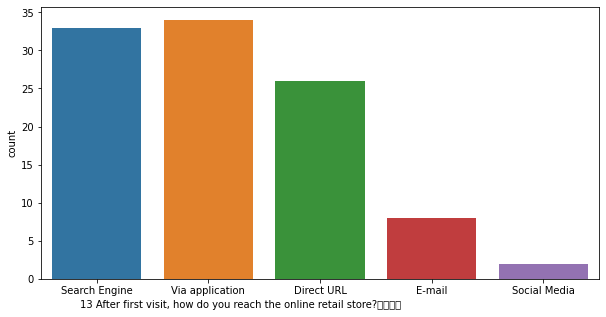

In [110]:
count(df['13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   '])

After first visit, how do you reach the online retail store?

1.Via Application.

2.Search Engine.

3.Direct URL.

4.E-mail.

5.Socail Media.

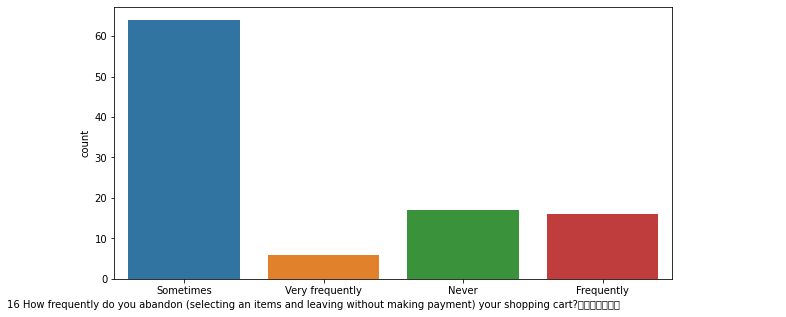

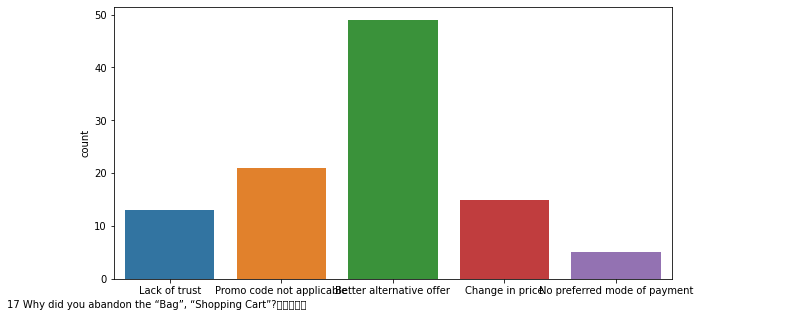

In [111]:
count(df['16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   '])
count(df['17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       '])

How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?

1.There are more number of customer, who abandon the shopping cart, Sometimes.

2.Never.

3.Frequently.

4.Very less number of customer abandon the shopping cart, very frequently.

In [112]:
poll = ['18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time',
       '27 Empathy (readiness to assist with queries) towards the customers',
       '28 Being able to guarantee the privacy of the customer',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)',
       '30 Online shopping gives monetary benefit and discounts',
       '31 Enjoyment is derived from shopping online',
       '32 Shopping online is convenient and flexible',
       '33 Return and replacement policy of the e-tailer is important for purchase decision',
       '34 Gaining access to loyalty programs is a benefit of shopping online',
       '35 Displaying quality Information on the website improves satisfaction of customers',
       '36 User derive satisfaction while shopping on a good quality website or application',
       '37 Net Benefit derived from shopping online can lead to users satisfaction',
       '38 User satisfaction cannot exist without trust',
       '39 Offering a wide variety of listed product in several category',
       '40 Provision of complete and relevant product information',
       '41 Monetary savings',
       '42 The Convenience of patronizing the online retailer',
       '43 Shopping on the website gives you the sense of adventure',
       '44 Shopping on your preferred e-tailer enhances your social status',
       '45 You feel gratification shopping on your favorite e-tailer',
       '46 Shopping on the website helps you fulfill certain roles',
       '47 Getting value for money spent']

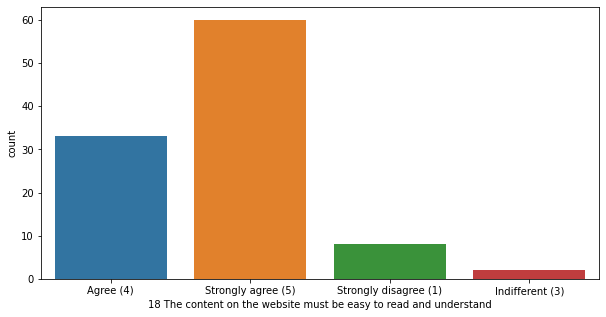

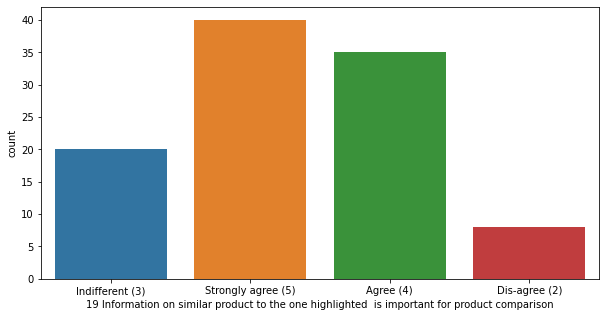

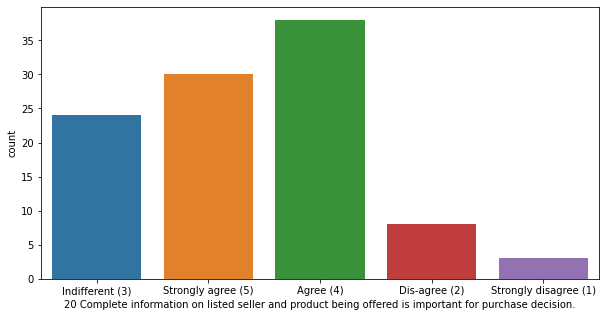

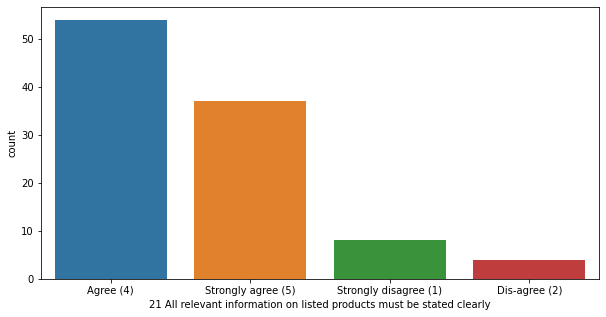

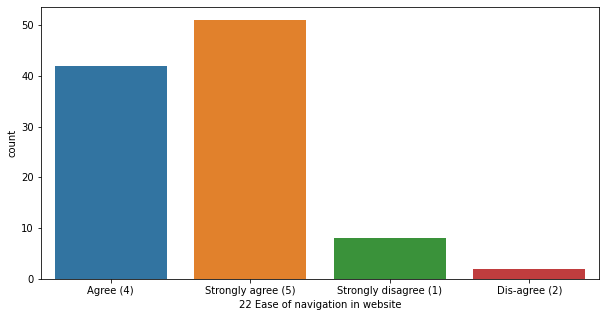

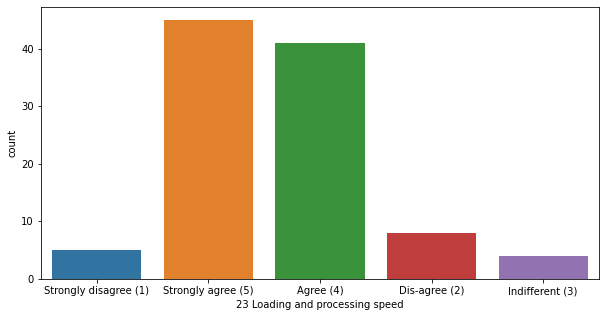

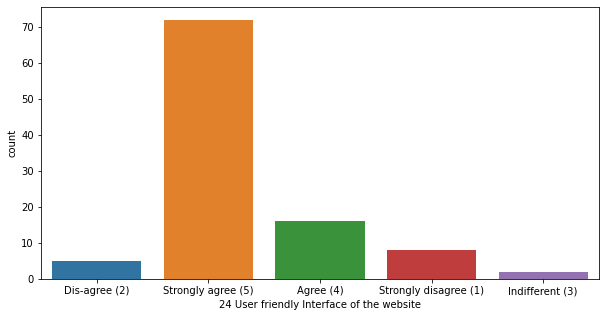

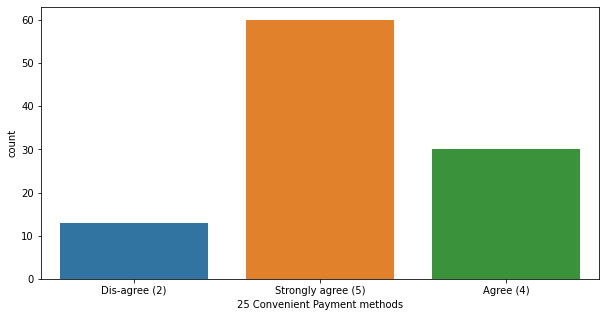

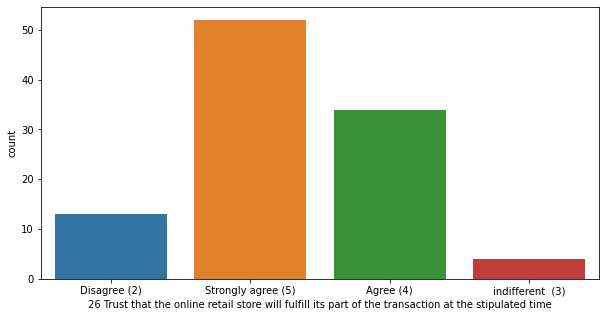

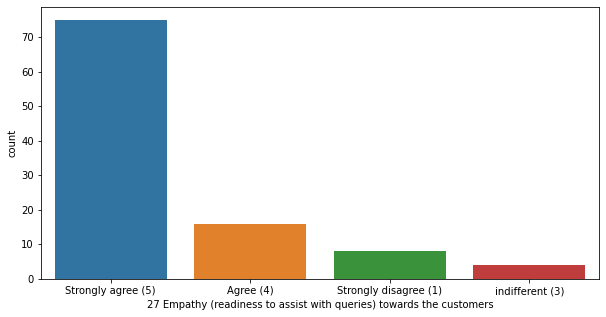

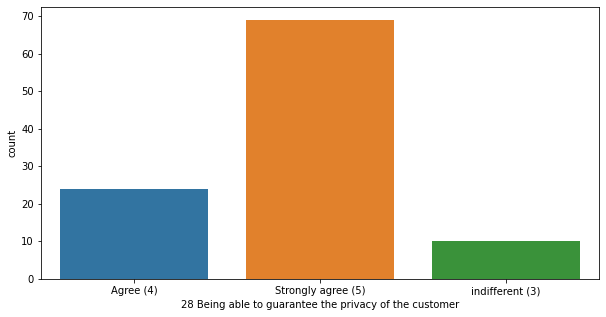

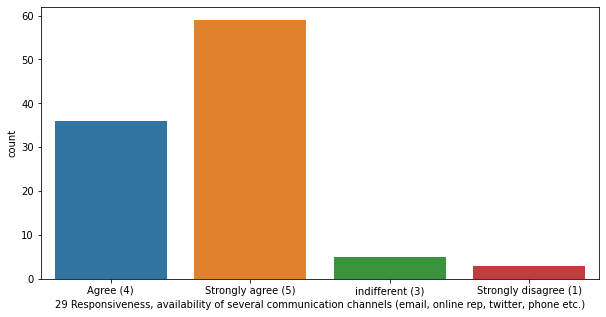

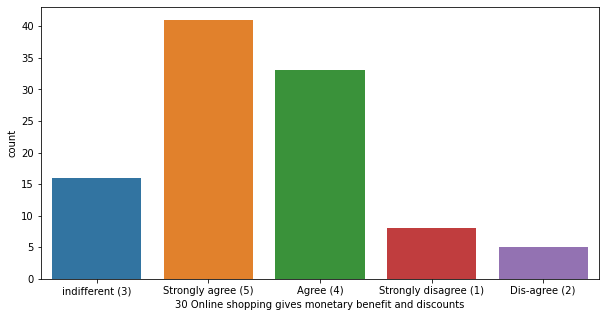

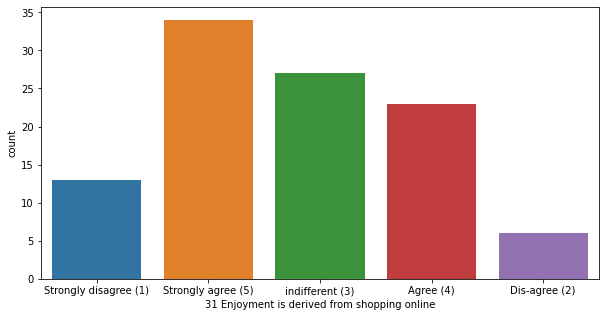

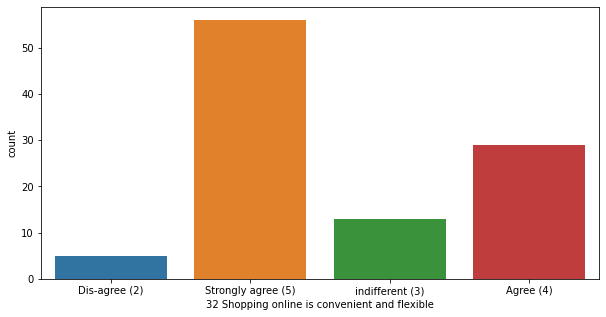

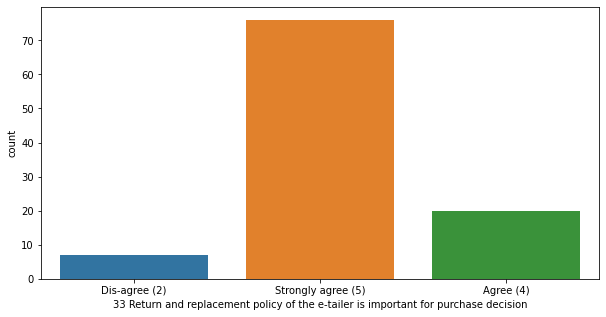

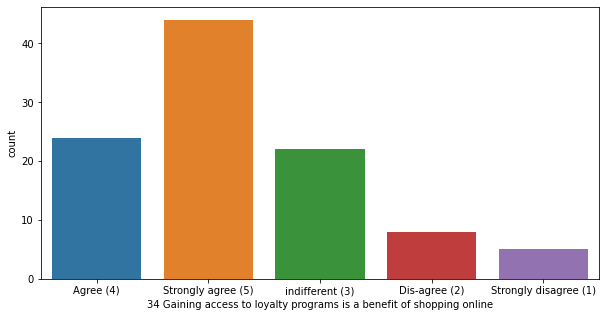

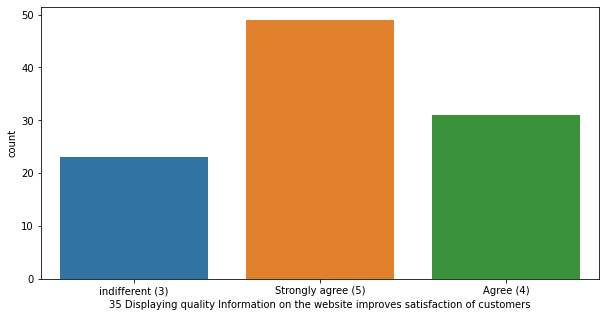

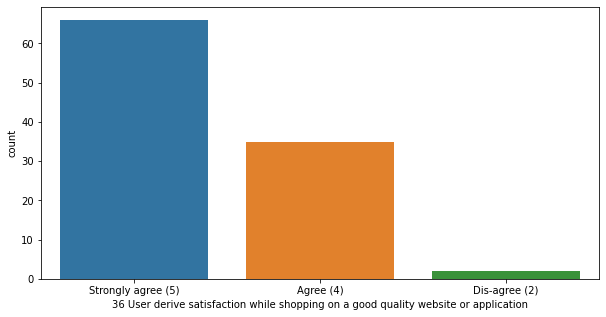

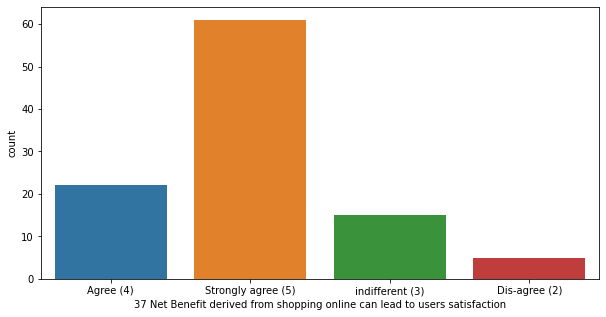

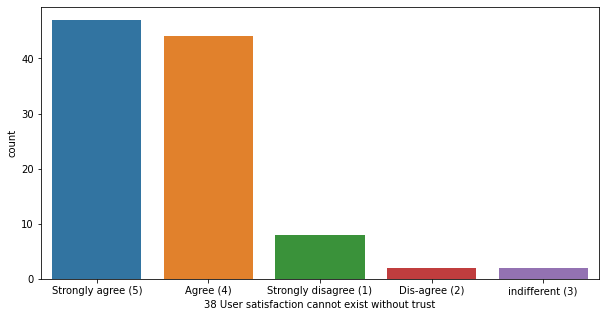

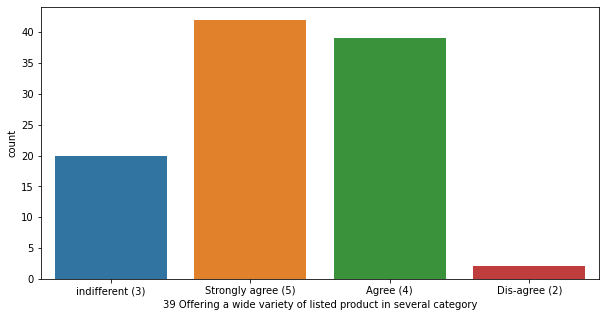

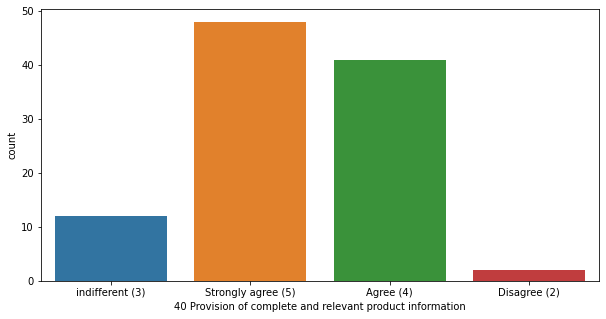

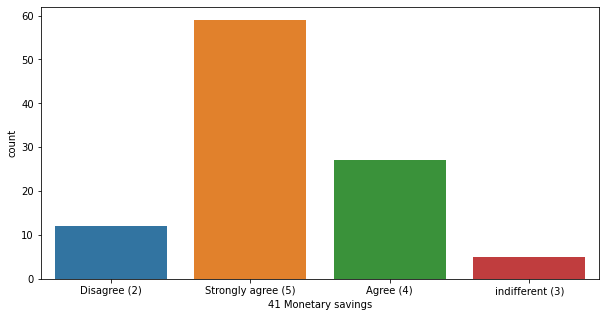

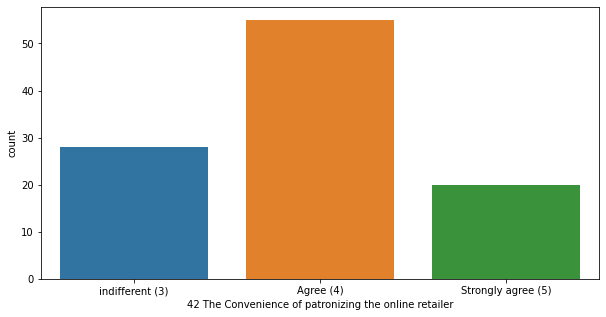

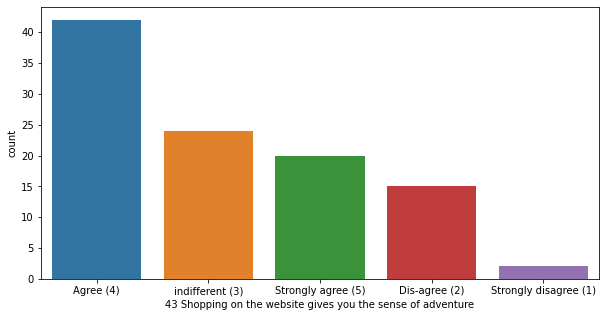

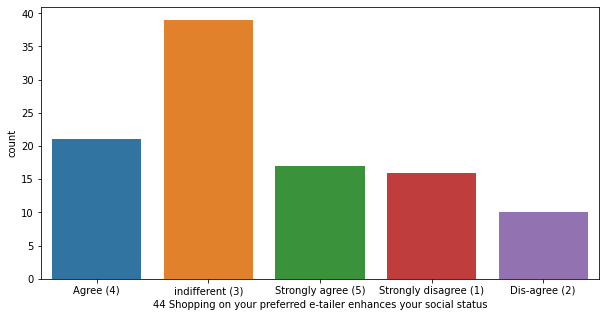

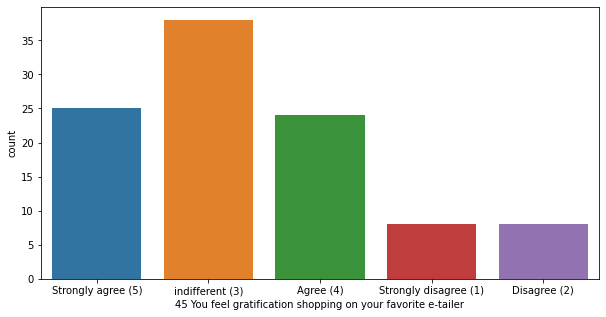

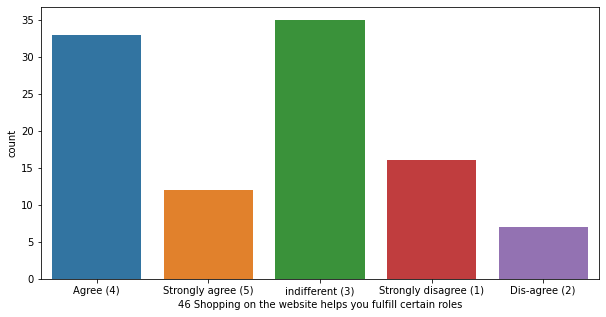

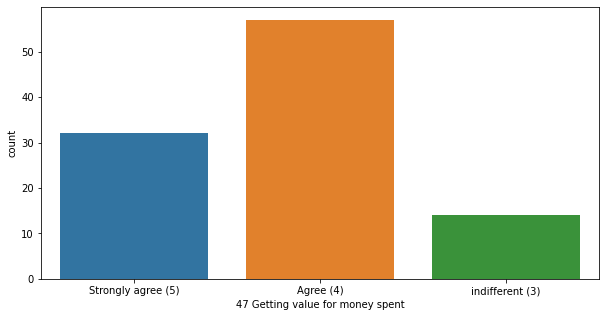

In [113]:
for i in poll:
    count(i)

Strongly agree/Agree/Disagree/Strongly disagree/Indifferent Poll.

Strongly agree/Agree, can be considered as Agreed.

Disagree/Strongly disagree, can be considered as Disagree.

***** All the columns in sd are like the poll columns for the customers, where they have to agree or disagree with the question of poll with there own experience on website they shop at ... *****

Most of the customers are agreed with the question and giving there opinions on the website.

There are very less number of customers who have voted for disagreed the condtition or question.

In some of the columns the preference have been given to the Indifferent, like:

Shopping on your preferred e-tailer enhances your social status.

You feel gratification shopping on your favorite e-tailer.

Shopping on the website helps you fulfill certain roles.

In [114]:
site = ['From the following, tick any (or all) of the online retailers you have shopped from;                                                                           ',
       'Easy to use website or application',
       'Visual appealing web-page layout', 'Wild variety of product on offer',
       'Complete, relevant description information of products',
       'Fast loading website speed of website and application',
       'Reliability of the website or application',
       'Quickness to complete purchase',
       'Availability of several payment options',
        'Speedy order delivery ',
       'Privacy of customers’ information',
       'Security of customer financial information',
       'Perceived Trustworthiness',
       'Presence of online assistance through multi-channel',
]

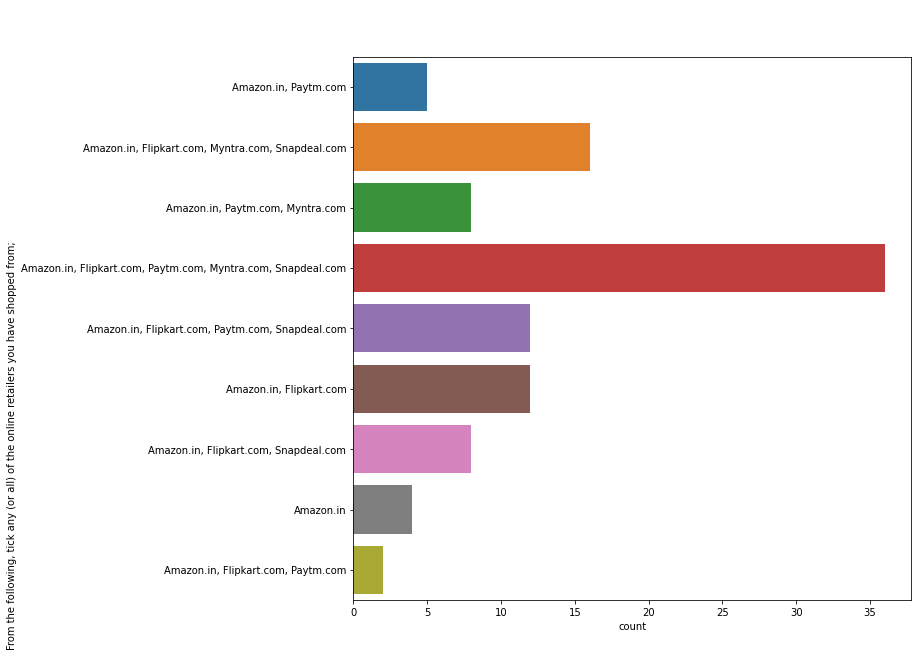

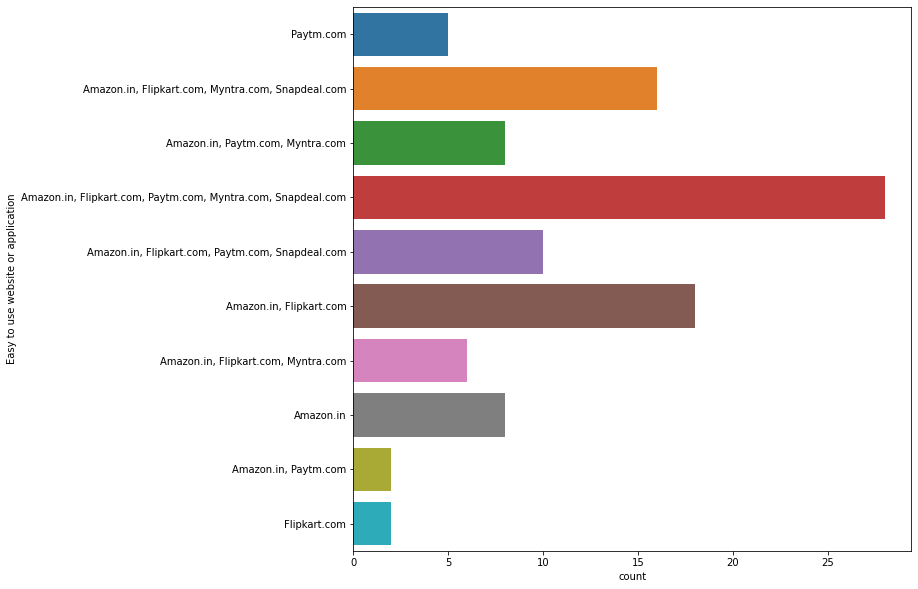

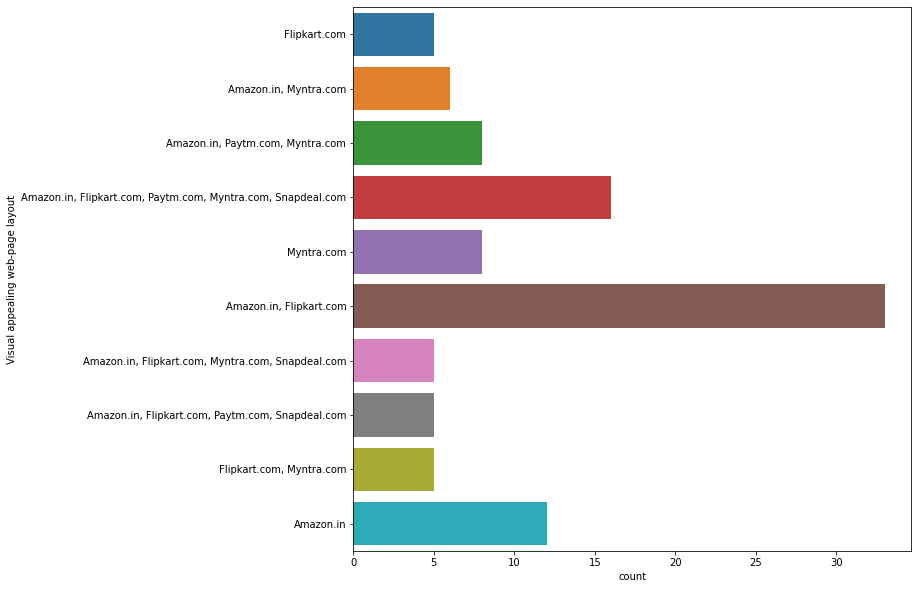

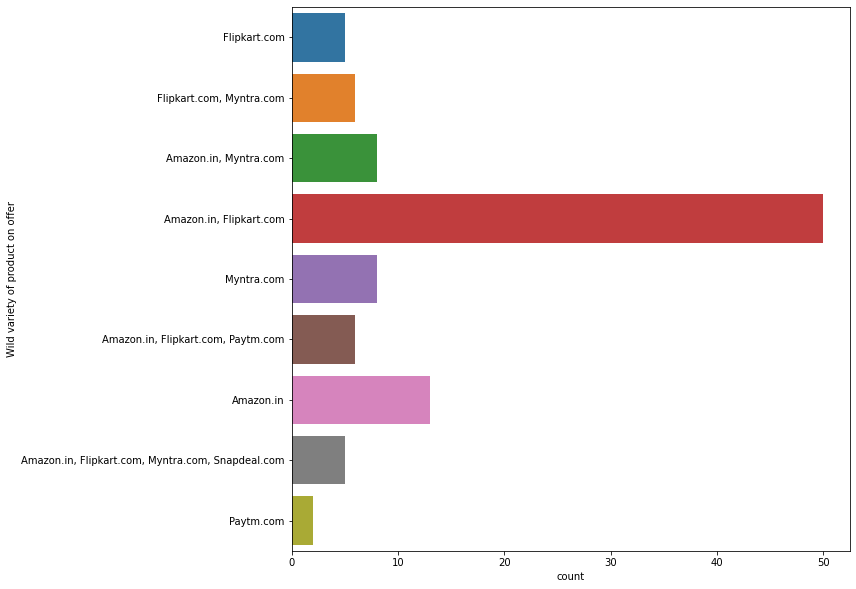

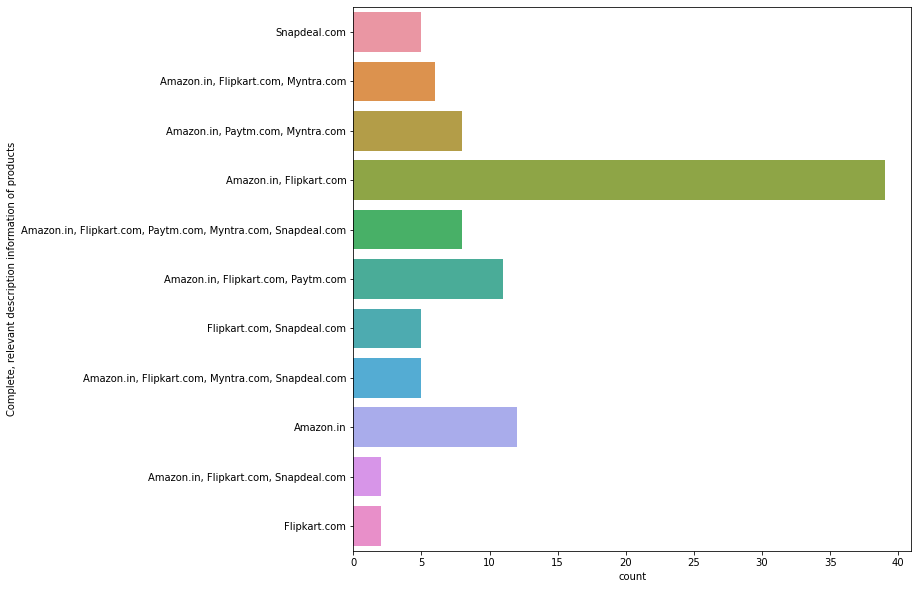

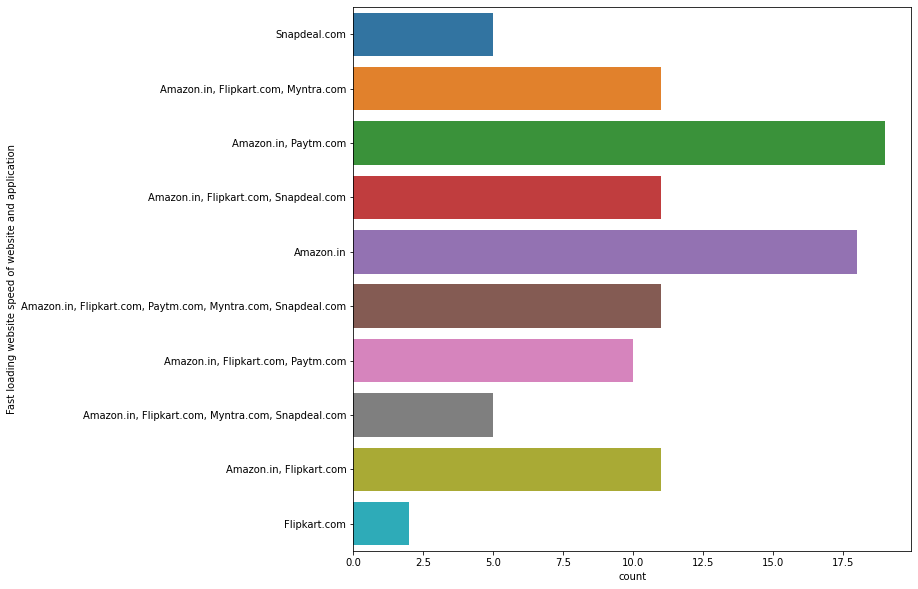

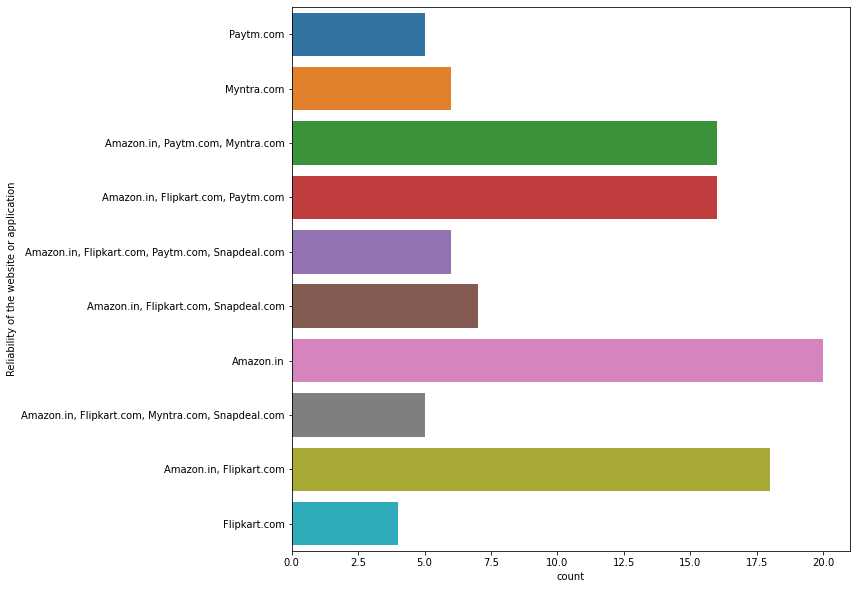

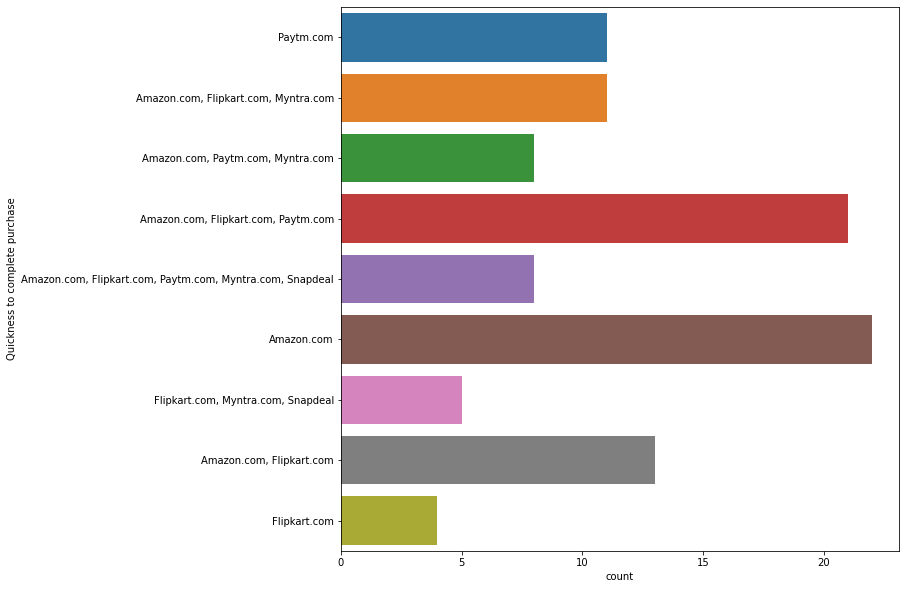

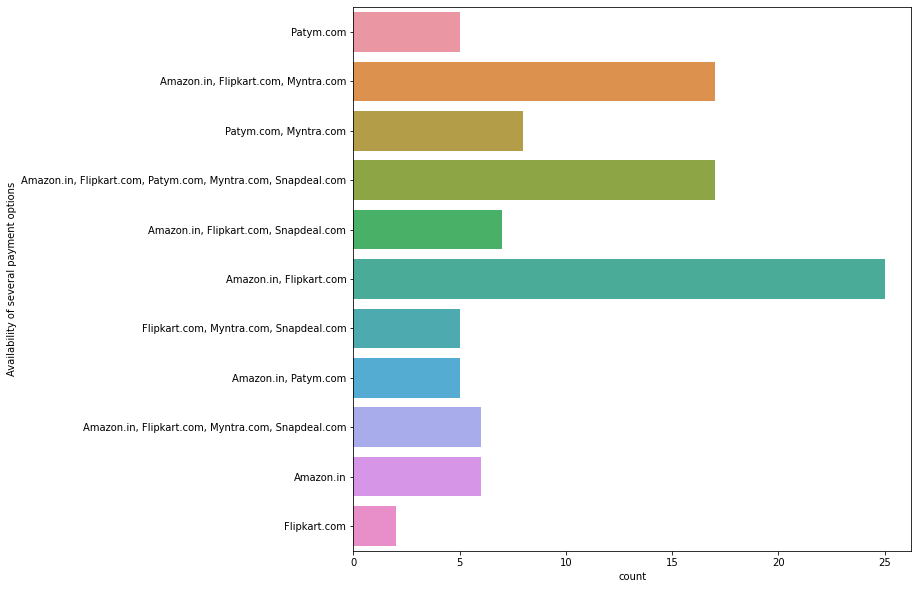

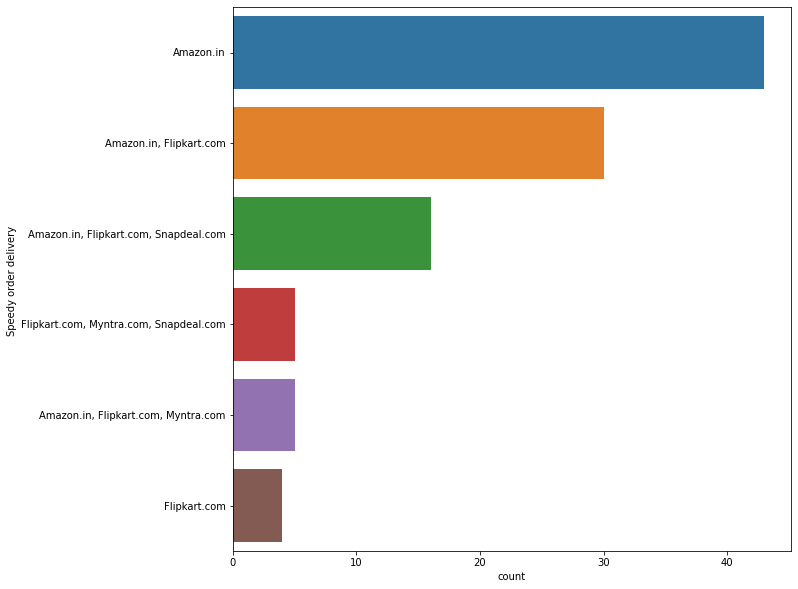

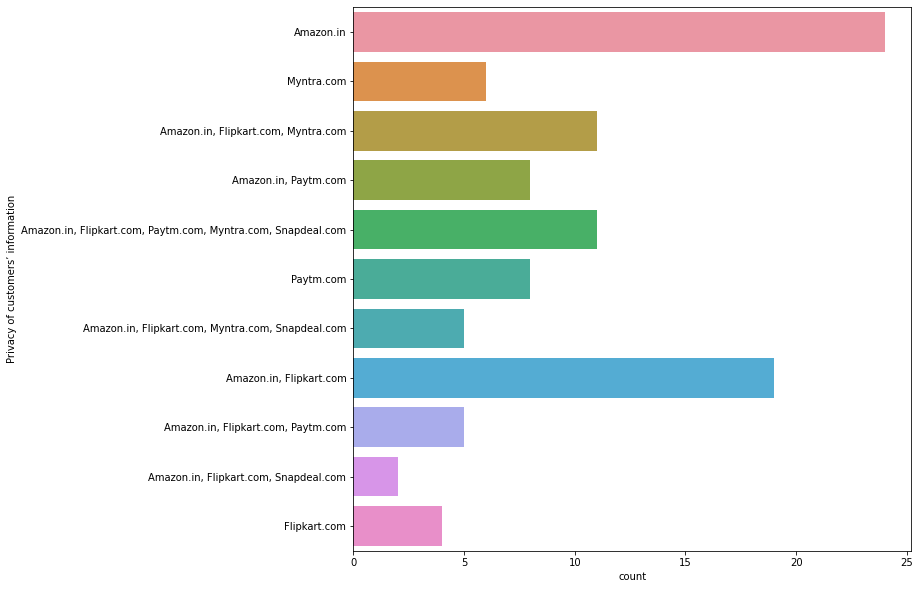

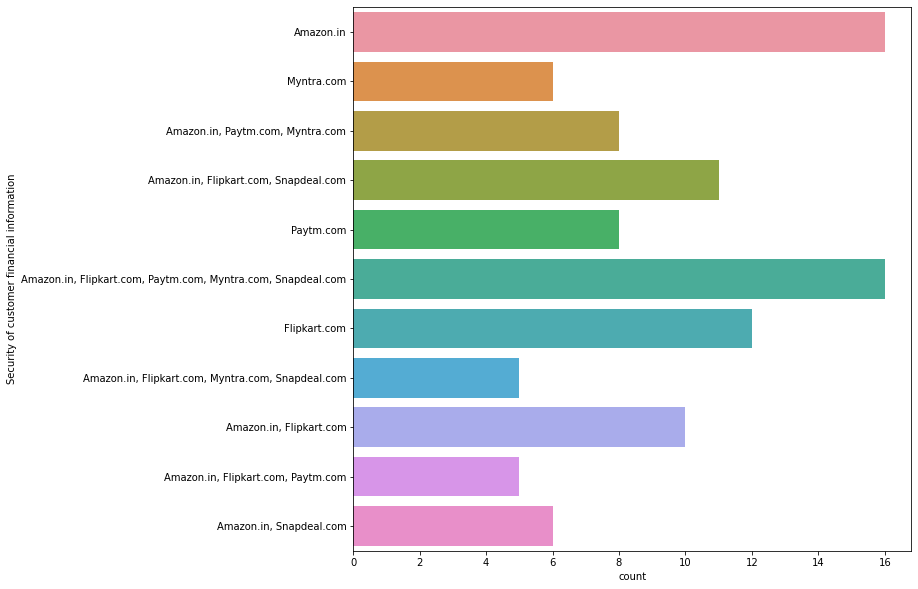

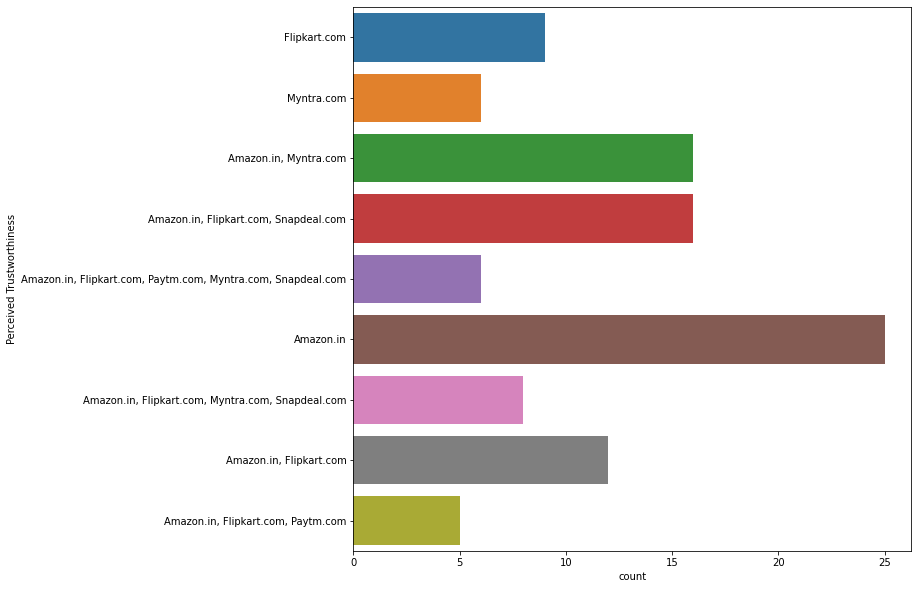

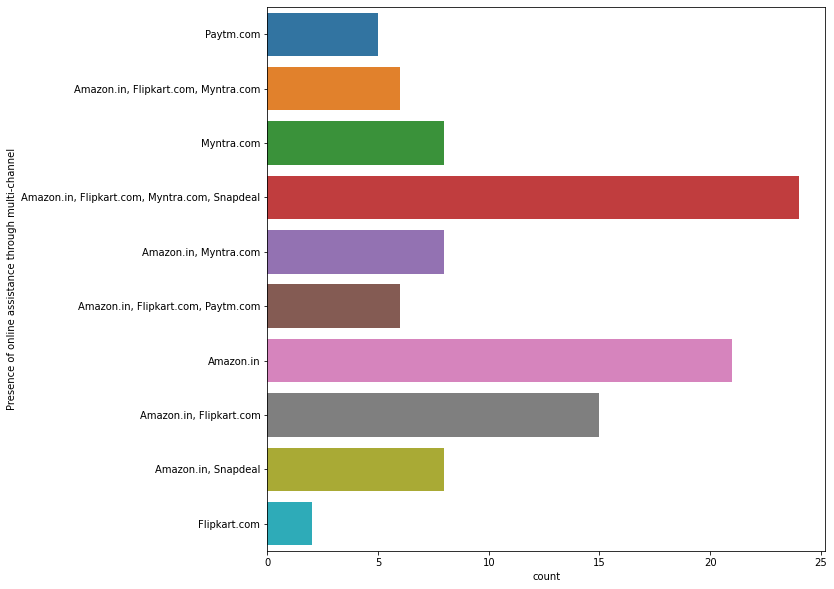

In [115]:
for i in site:
    ycount(i)

In [116]:
df[site].describe()

,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel
count,103,103,103,103,103,103,103,103,103,103,103,103,103,103
unique,9,10,10,9,11,10,10,9,11,6,11,11,9,10
top,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Paytm.com",Amazon.in,Amazon.com,"Amazon.in, Flipkart.com",Amazon.in,Amazon.in,Amazon.in,Amazon.in,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal"
freq,36,28,33,50,39,19,20,22,25,43,24,16,25,24


Based on customers experenice, they have voted for the website and these questions are the positive feedback       for every website.
- Amazon.in
- Flipkart.com
- Myntra.com
are on the top in vote for every questions asked to the customers.
So, we can considered that these websites are the shopping website, which is loved by custmores, and having
alot of happy customers with it.

In [117]:
negative = ['Longer time to get logged in (promotion, sales period)',
       'Longer time in displaying graphics and photos (promotion, sales period)',
       'Late declaration of price (promotion, sales period)',
       'Longer page loading time (promotion, sales period)',
       'Limited mode of payment on most products (promotion, sales period)',
       'Longer delivery period', 'Change in website/Application design',
       'Frequent disruption when moving from one page to another',
      ]

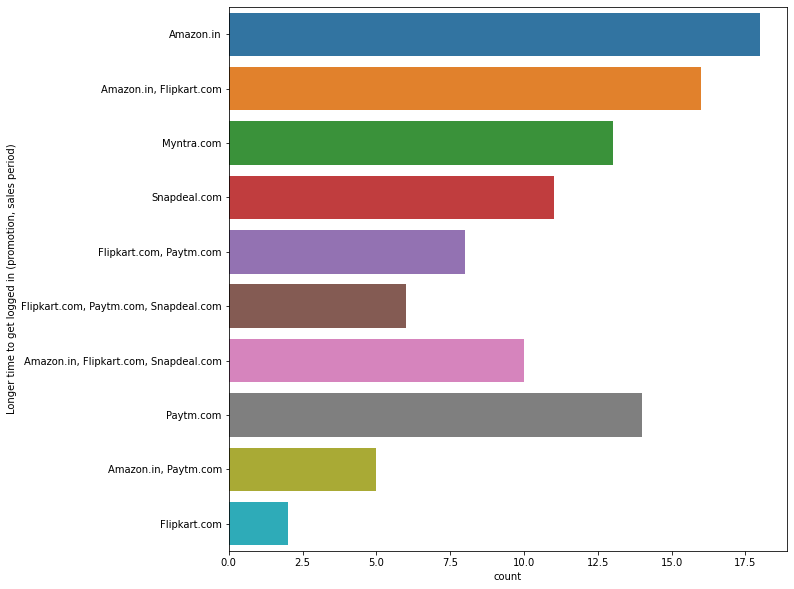

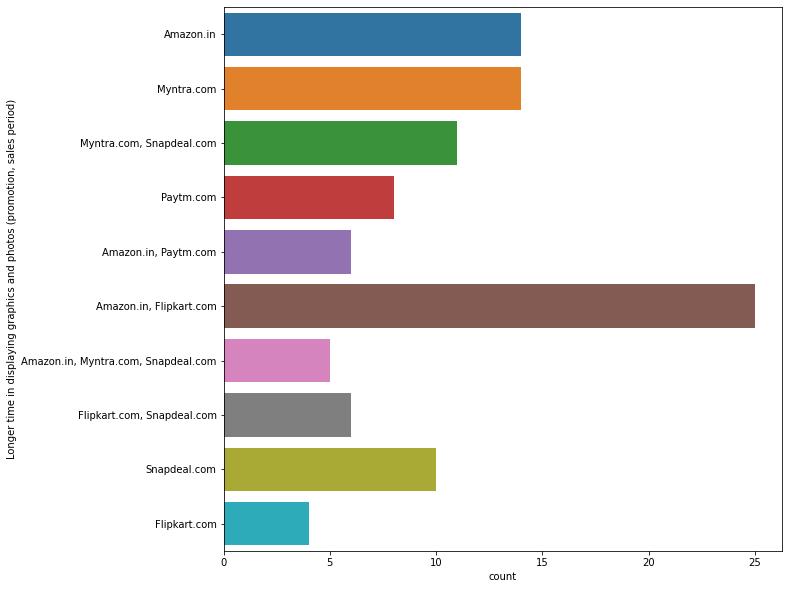

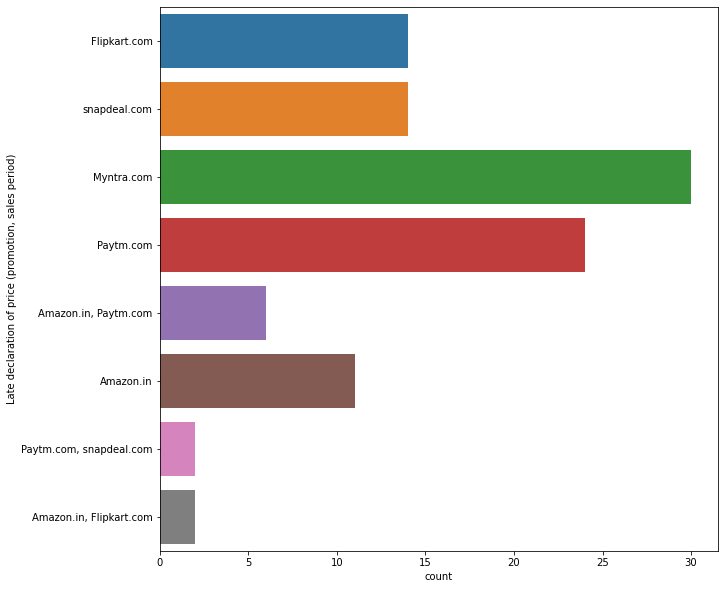

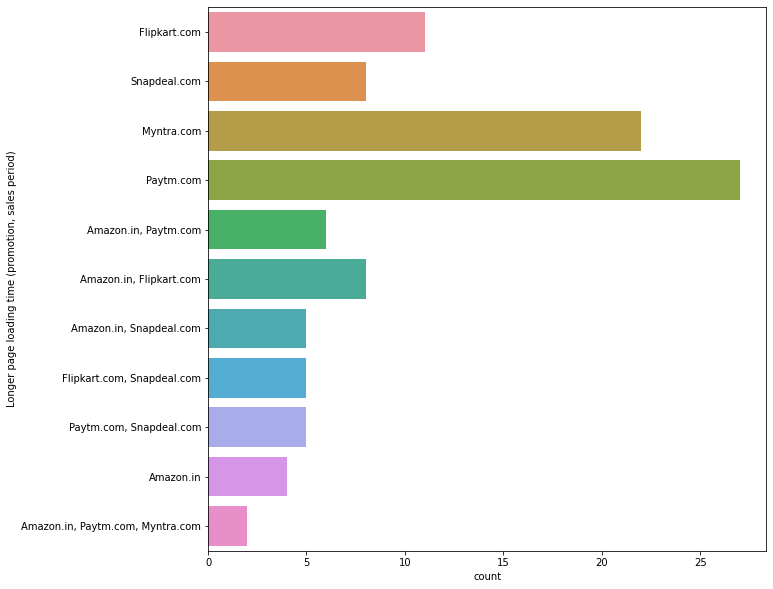

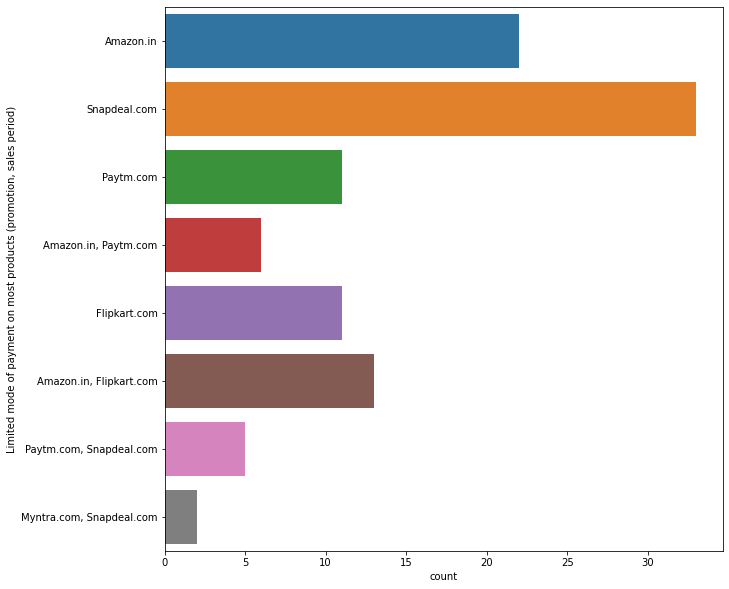

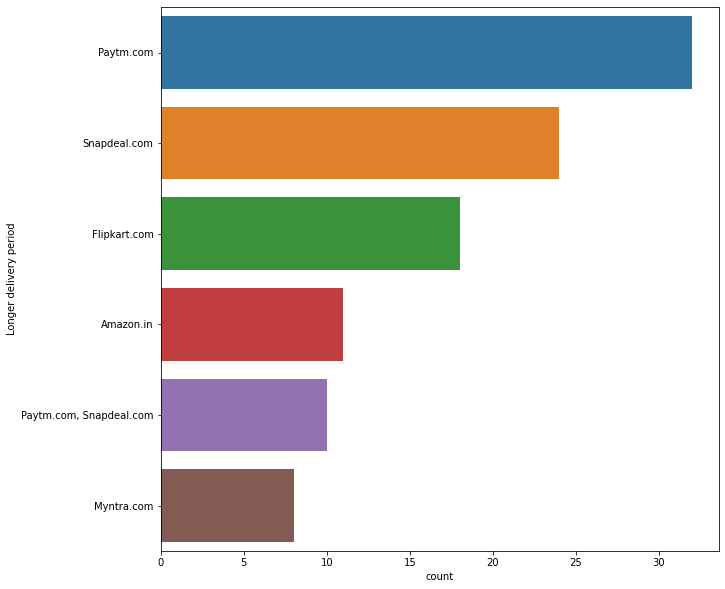

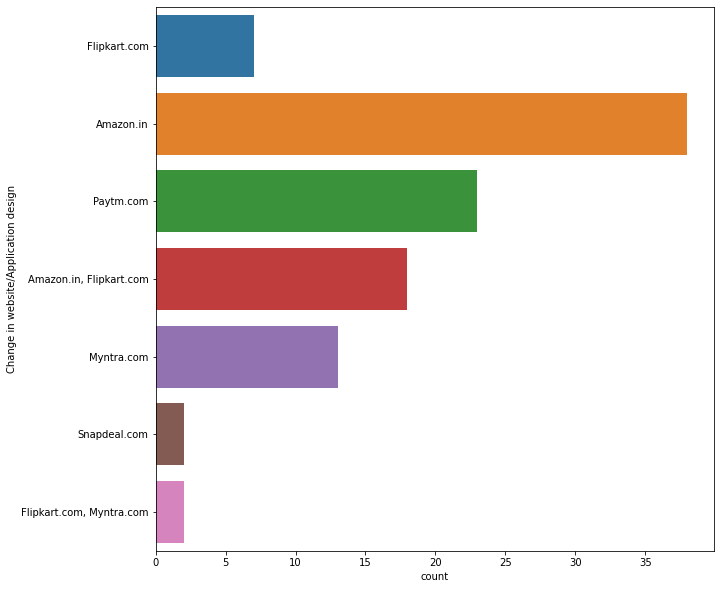

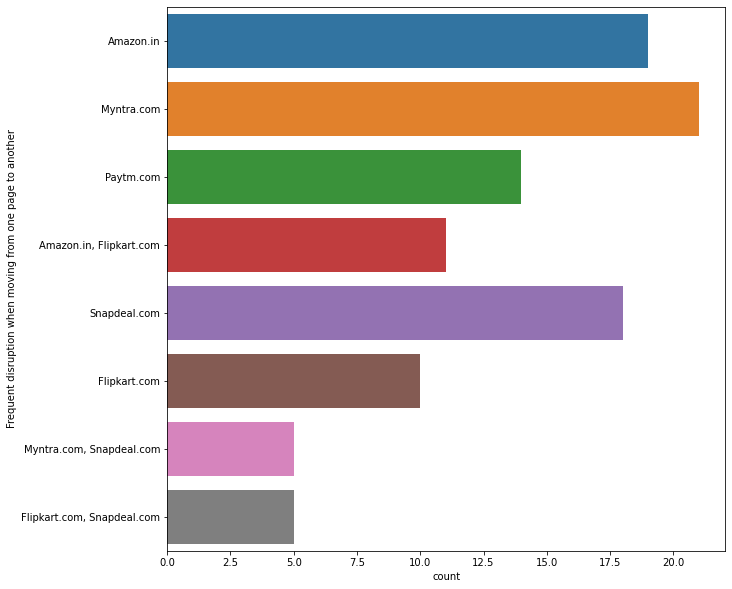

In [118]:
for i in negative:
    ycount(i)

In [119]:
df[negative].describe()


,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another
count,103,103,103,103,103,103,103,103
unique,10,10,8,11,8,6,7,8
top,Amazon.in,"Amazon.in, Flipkart.com",Myntra.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Myntra.com
freq,18,25,30,27,33,32,38,21


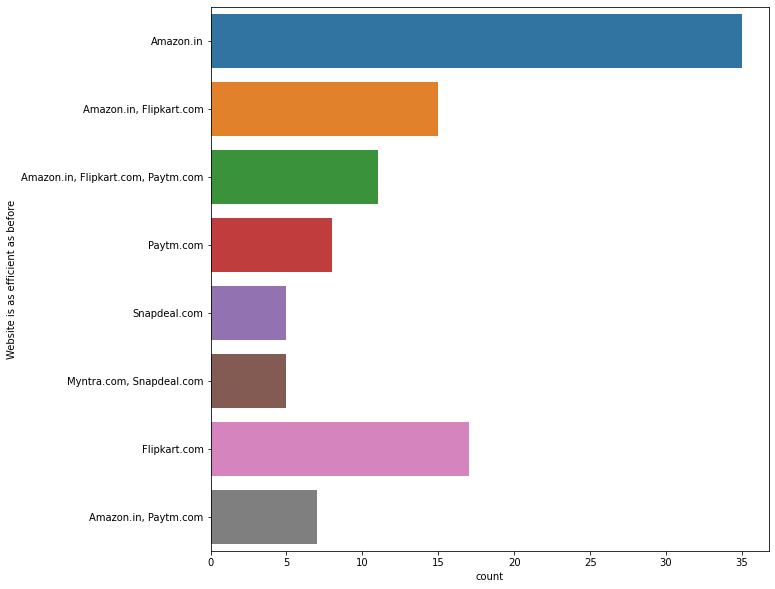

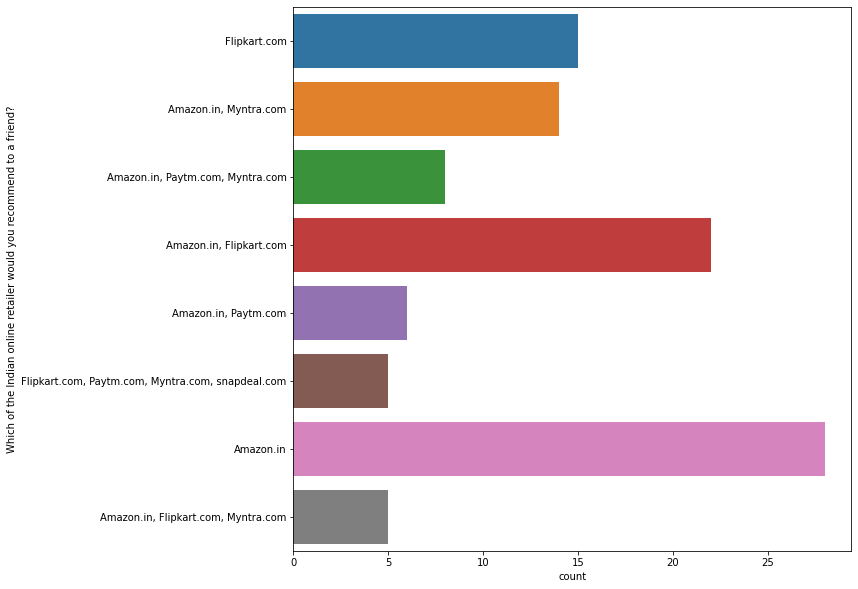

In [120]:
ycount(df['Website is as efficient as before'])
ycount(df['Which of the Indian online retailer would you recommend to a friend?'])

Website is as efficient as before

Positive for Website,

1.Amazon is still on the top and after that flipkart is there.

2.Which of the Indian online retailer would you recommend to a friend?

3.Amazon.in is the most recommended website, among all other website.

4.Myntra.com & Flipkart.com, are on the 2nd in recommendation

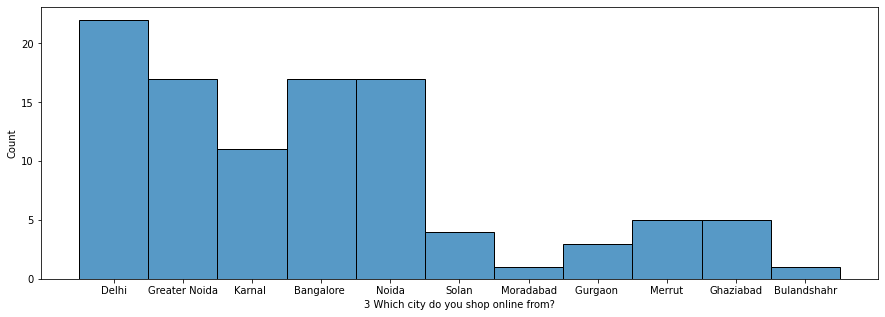

In [121]:
hist(df['3 Which city do you shop online from?'])

Which city do you shop online from?

Top to Down.

1.Delhi

2.Greater Noida.

3.Noida.

4.Bangalore.

5.Karnal.

6.Solan & Ghaziabad.

7.Gurgaon.

8.Merut.

9.Moradabad.

10.Bulandshahr.

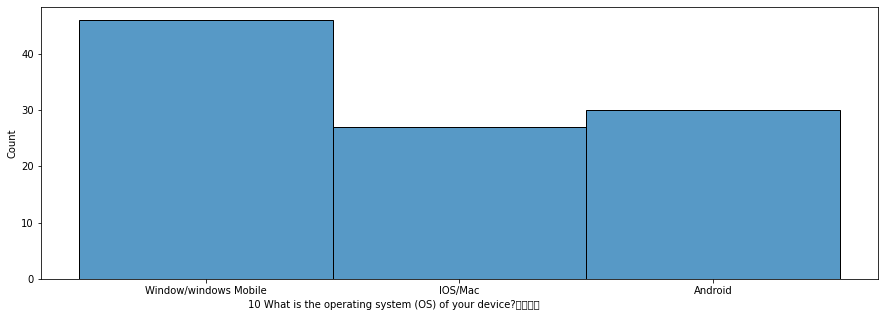

In [124]:
hist(df['10 What is the operating system (OS) of your device?\t\t\t\t                                          '])

What is the operating system (OS) of your device?

1.Windows

2.Android.

3.IOS/Mac.

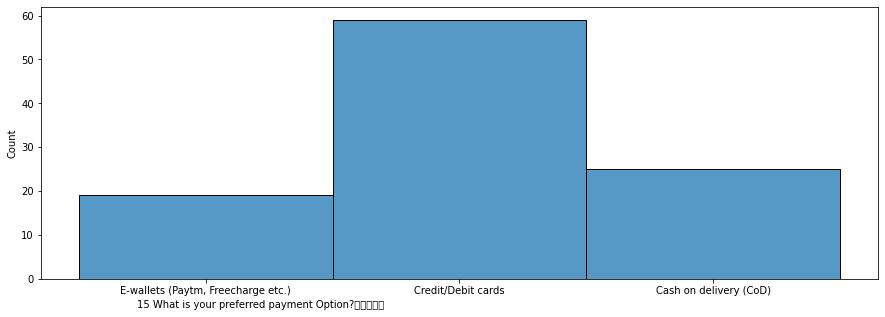

In [125]:
hist(df['15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               '])

What is your preferred payment Option?

1.Most of the customers, prefer the Credit/Debit cards option to make the payment on website for online shopping.

2.Cash on delivery(COD), comes next in preference of payment method.

3.E-wallets like paytm,freecharge etc, comes last on the preference.

Scatterpot between 6 How many times you have made an online purchase in the past 1 year? and 3 Which city do you shop online from?


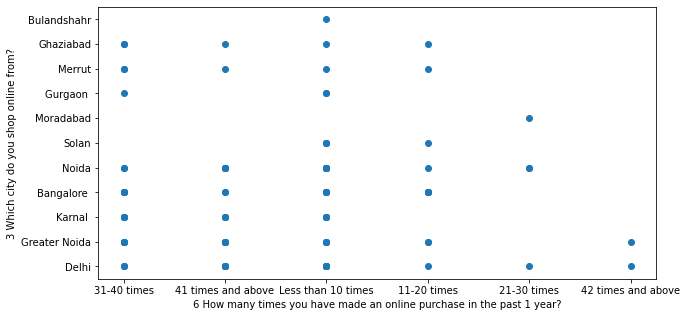

In [126]:
scatter(x = '6 How many times you have made an online purchase in the past 1 year?', y = '3 Which city do you shop online from?', data = df)


Scatterpot between 8 Which device do you use to access the online shopping? and 7 How do you access the internet while shopping on-line?


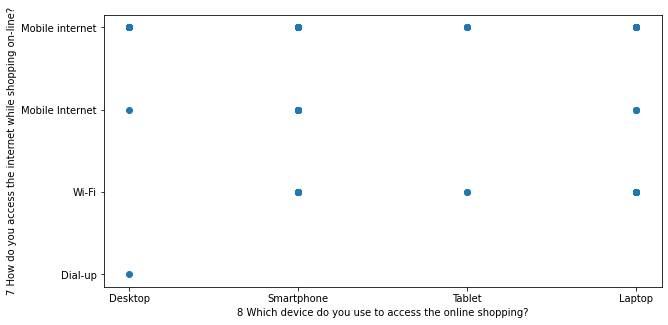

In [127]:
scatter(x = '8 Which device do you use to access the online shopping?', y = '7 How do you access the internet while shopping on-line?', data = df)

# Correlation

In [135]:
df1 = pd.read_csv('customer_retention_dataset.csv')
df1

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout,Wild variety of product on offer,"Complete, relevant description information of products",Fast loading website speed of website and application,Reliability of the website or application,Quickness to complete purchase,Availability of several payment options,Speedy order delivery,Privacy of customers’ information,Security of customer financial information,Perceived Trustworthiness,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you

In [136]:
df1.shape

(269, 71)

In [140]:
df1.duplicated().sum()

130

In [142]:
df1.drop_duplicates(inplace=True)

In [143]:
df1.drop('4 What is the Pin Code of where you shop online from?',axis=1,inplace=True)

In [144]:
df1.describe()

,1Gender of respondent,2 How old are you?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t",14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.00000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,0.625899,2.985612,3.510791,2.848921,3.841727,1.712230,4.244604,1.812950,1.280576,1.366906,2.546763,3.942446,1.81295,2.928058,2.697842,4.316547,4.064748,3.834532,4.043165,4.230216,4.079137,4.338129,4.323741,4.208633,4.446043,4.575540,4.431655,3.913669,3.561151,4.309353,4.589928,3.956835,4.258993,4.597122,4.352518,4.143885,4.179856,4.323741,4.294964,3.920863,3.611511,3.172662,3.489209,3.208633,4.179856
std,0.485640,1.028476,1.486007,1.659027,1.205416,0.878442,0.961895,0.821525,0.614189,0.893972,1.275312,1.153255,1.13296,1.047013,1.360172,1.103591,0.949513,1.039768,1.122048,1.124925,1.116833,1.236838,1.001563,1.017775,1.136819,0.670047,0.834495,1.200737,1.346574,0.883413,0.

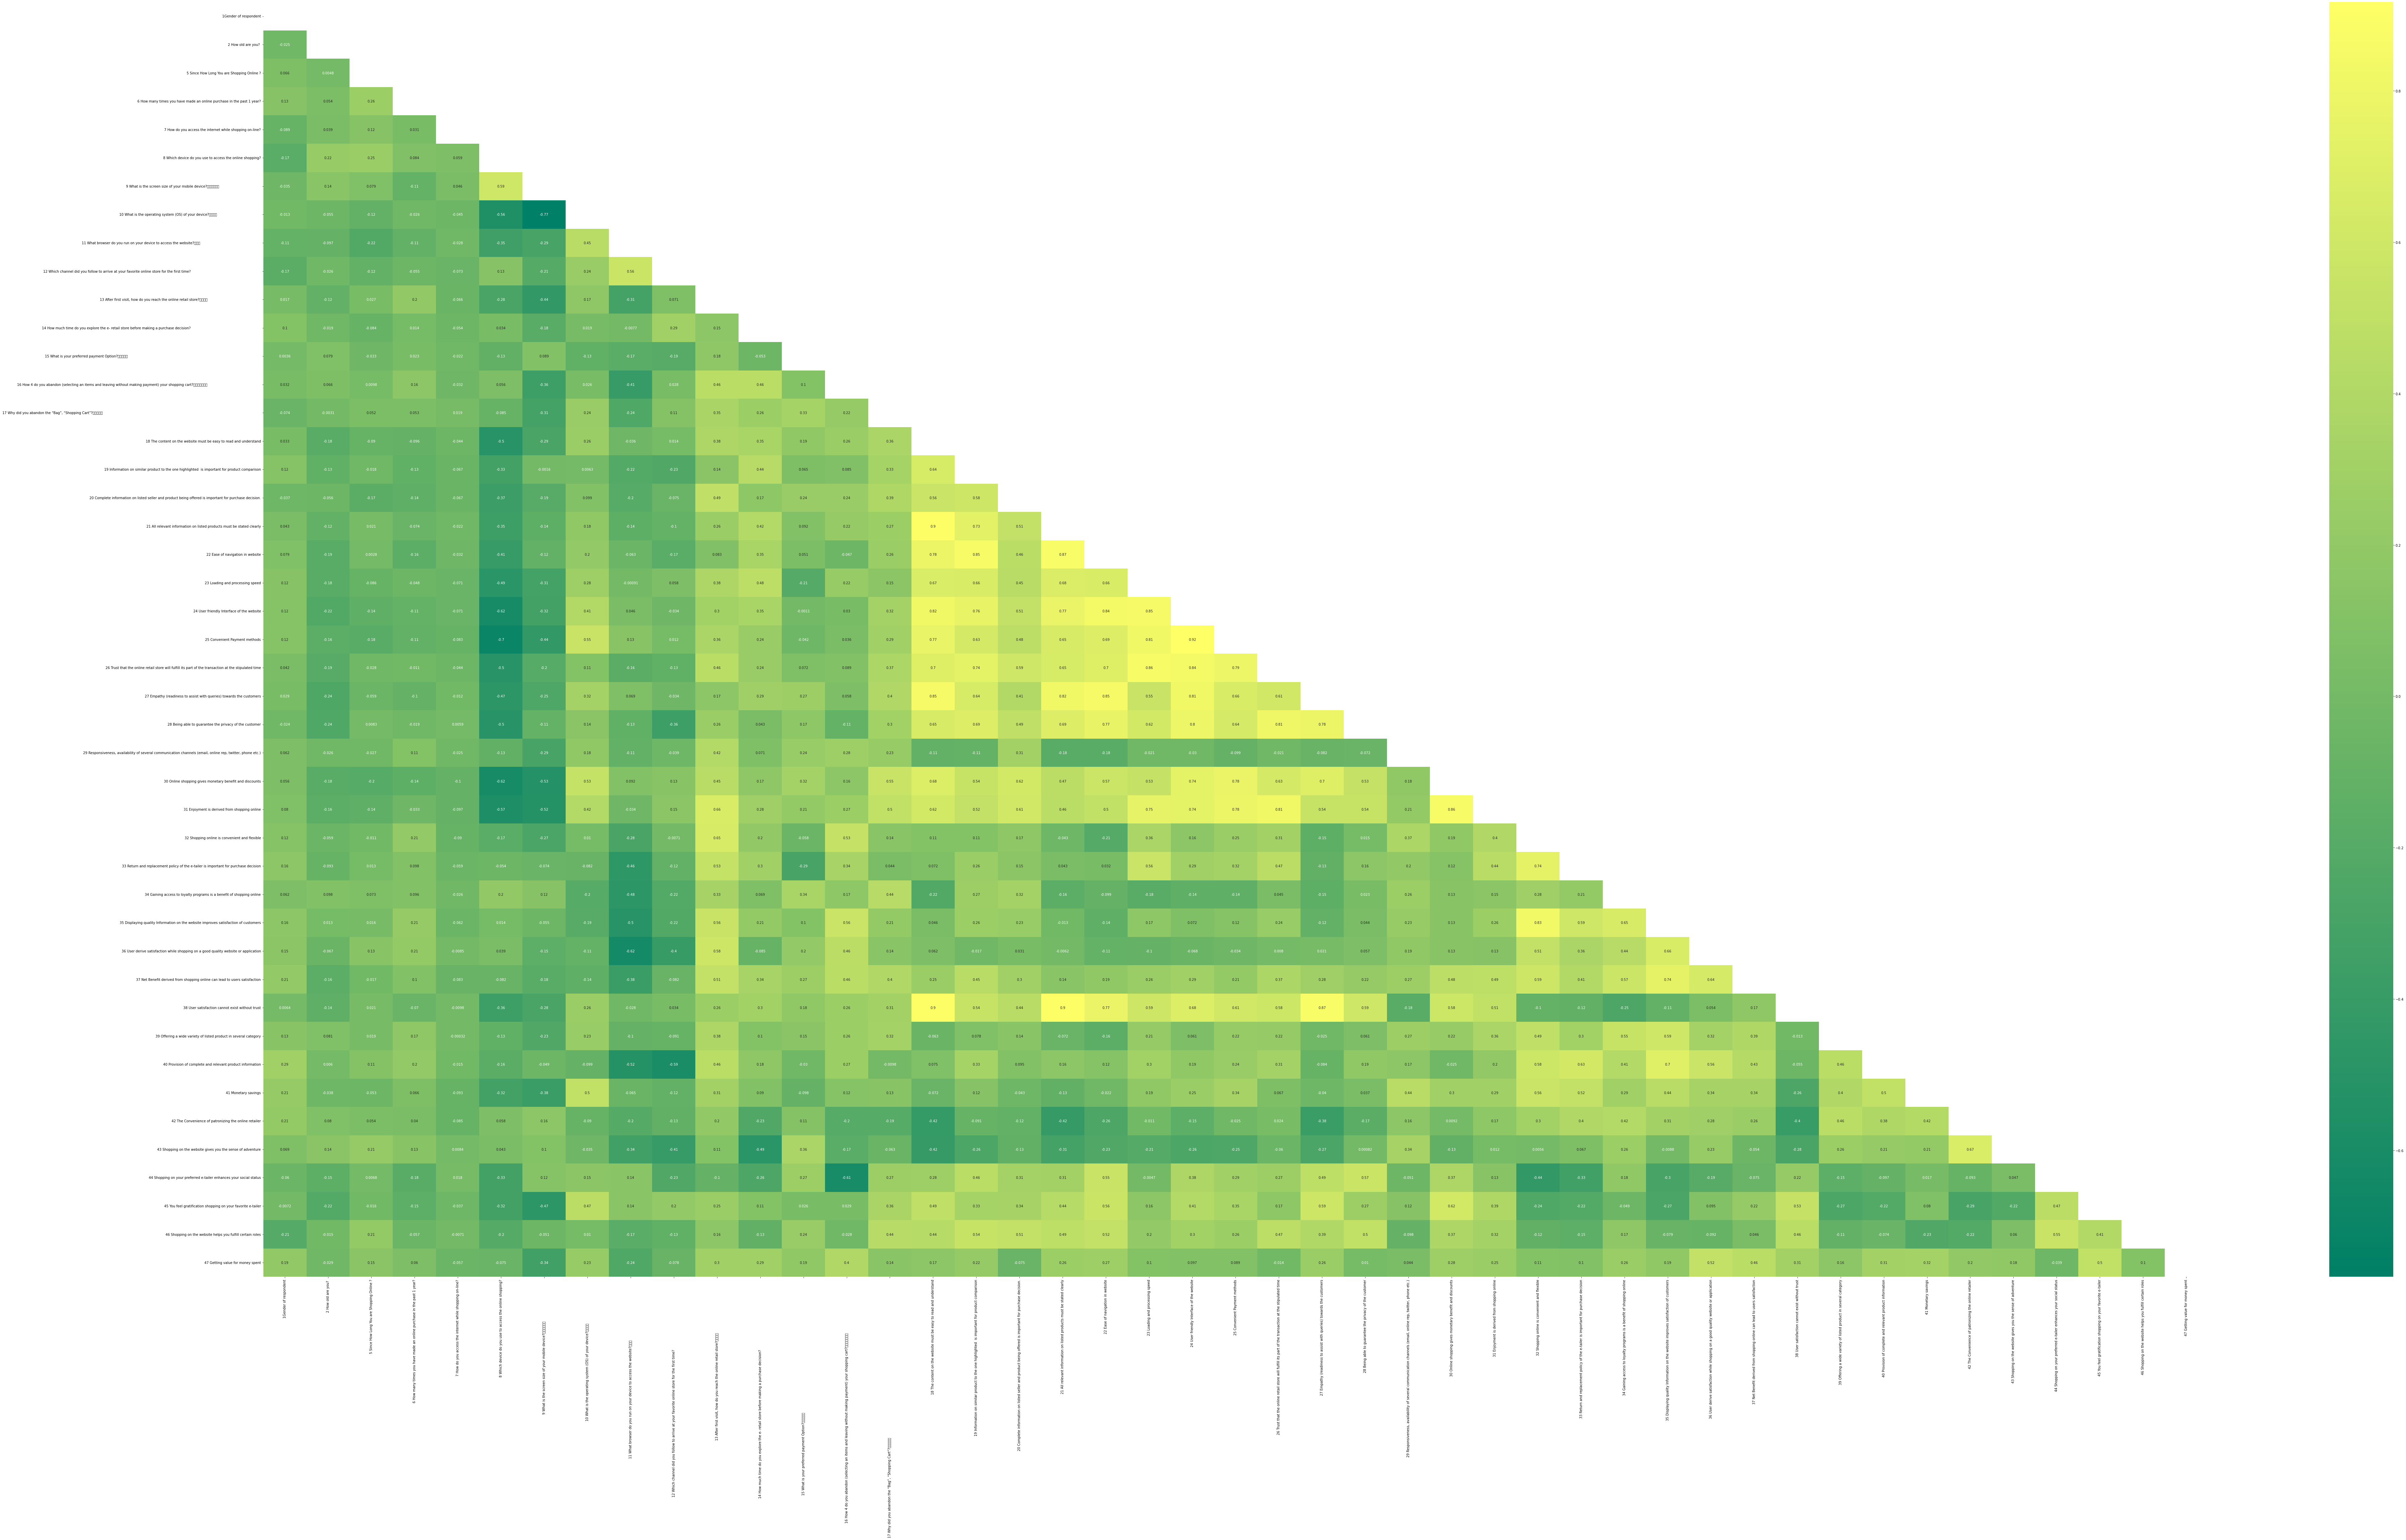

In [145]:
plt.figure(figsize = (130,70))
sns.heatmap(df1.corr(), annot=True,cmap='summer',mask=np.triu(np.ones_like(df1.corr())))
plt.show()

There are multicollinearity problem present in our dataset. Most of the columns are correlated with each other.